<a href="https://colab.research.google.com/github/MMucahit/PyhtonDeepLearningFrancoisChollet/blob/main/IMDB(%C4%B0kili_s%C4%B1n%C4%B1fland%C4%B1rma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GPU mu kullanıyoruz ?

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Hangi GPU kullanıyoruz ?

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13738621121886279868, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17061381120900406391
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

IMDB Veri setini yüklemek

In [3]:
## 50000 adet film kritiği içeren bir veri setidir. 25000 örnek eğitim verisi seti 25000 örnek test için ayrılmıştır. İki settede %50 olumlu kritik %50 olumsuz kritik bulunmaktadır

from keras.datasets import imdb

In [4]:
num_words = 10000
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words= num_words) ## en sık tekrar eden 10000 kelime

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
print('train_data[0] = ',train_data[0]) ## cümleleri temsil eden vektör
print('train_labels[0] = ',train_labels[0]) ## olumlu olumsuz ==> 1, 0

train_data[0] =  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_labels[0] =  1


In [6]:
word_index = imdb.get_word_index() ## kelimeleri bir tam sayı indekse eşleyen sözlüktür.
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) ## Tam sayı indeksleri kelimelere dönüştürür.

In [7]:
## Kritikleri alır. İndeks değerlerini 3 atlayarak almakta çünkü 0, 1 ve 2 sırayla yapılan sıfır eklemelerini, dizinin başlangıcını ve bilinmeyenleri kodlamak için ayrılmıştır.
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

Verileri Hazırlamak

In [8]:
import numpy as np

In [9]:
## İçerisinde sayı bulunan listeleri sinir ağına gönderemeyiz. Listeleri tensöre dönüştürmeliyiz. 
## - Tüm elemanları aynı uzunlukta olacak şekilde eksikleri sıfırlar ile doldurun ve (samples, word_indices) şeklinde tam sayı tensörlerine dönüştürün.
## - Listenizi one-hot olarak kodlayın.
def vectorize_sequence(sequences, dimension = num_words):
  ## (len(sequences), dimension) şeklinde tüm elemanları sıfır olan matris oluşturulur.
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 ## results[i]' nin istenen indekslerini 1 yapar
  return results  

In [10]:
## Yukardaki kodun çalışma mantığı için:
x_train = [[1,2,3],[4,5,6]]
result = np.zeros((len(x_train), 10))
print(result)
result[0,x_train[0]] = 1
result[1,x_train[1]] = 1
result

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])

In [11]:
x_train = vectorize_sequence(train_data,num_words) ## Eğitim vektör verisi
x_test = vectorize_sequence(test_data,num_words) ## Test vektör verisi

In [12]:
x_train.shape[1]

10000

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Ağı İnşa etmek

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
## Relu aynı zamanda doğrusallığı bozan olarakda adlandırılır. output = dot(W, input) + b işlemindeki doğrusallığı bozar ve Derinsellik katar.

In [16]:
## output = relu(dot(W, input) + bias) ==> 16 nöron bulunması W ağırlık matrisini (input_dimension, 16) şeklinde olması anlamına gelir.
## W matrisi ile iç çarpım(dot) işlemi girdi verilerini 16 boyutlu bir gösterim uzayına dönüştürür.  
model = Sequential()
model.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
model.add(Dense(16, activation= 'relu')) ## hidden2 katmanında 16 nöron
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [17]:
## crossentropy Bilgi kuramından gelir ve olasılık dağılımları arasındaki uzaklığı ölçer, bizim durumumuzda ise tahminler ile olması gereken dağılım uzaklığını ölçer.
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

Yaklaşımımızı Doğrulamak

In [18]:
## Eğitim başarımını ölçmek için ağın daha önçe görmediği özgün veri setinden 10000 örnekden oluşan doğrulama(validation) veri seti oluştururuz.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Modeli Eğitmek

In [19]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5690 - accuracy: 0.7348 - val_loss: 0.3728 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3085 - accuracy: 0.9026 - val_loss: 0.3009 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2147 - accuracy: 0.9374 - val_loss: 0.2806 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1704 - accuracy: 0.9482 - val_loss: 0.3011 - val_accuracy: 0.8791
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1370 - accuracy: 0.9595 - val_loss: 0.3050 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1132 - accuracy: 0.9692 - val_loss: 0.2937 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0884 - accuracy: 0.9778 - val_loss: 0.3130 - val_accuracy: 0.8813
Epoch 8/20
30

In [20]:
## model.fit() methodu History nesnesini döndürmektedir. Bu nesnein, eğitim boyunca neler olduğu bilgisini bulunduran history isimli bir elemanı bulunmaktadır.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

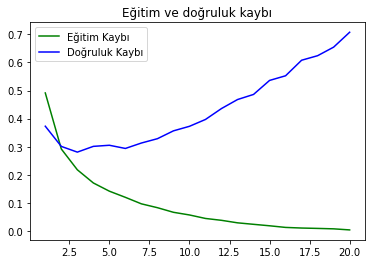

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

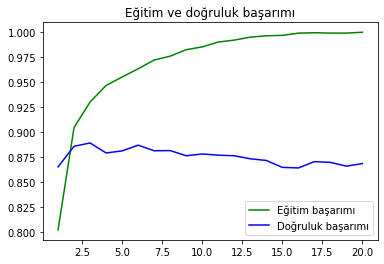

In [22]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'g', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [23]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7607 - accuracy: 0.8526


In [24]:
## Model 3. Epokdan sonra overfitting e maruz kalıyor o yüzden epoch sayısını 3 yapabiliriz.

3 epoch Model

In [25]:
Model = Sequential()
Model.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model.add(Dense(16, activation= 'relu')) ## hidden2 katmanında 16 nöron
Model.add(Dense(1, activation= 'sigmoid'))
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [26]:
Model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
history = Model.fit(partial_x_train,partial_y_train,epochs = 3, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/3
30/30 [==============================] - 1s 26ms/step - loss: 0.5956 - accuracy: 0.6851 - val_loss: 0.3791 - val_accuracy: 0.8687
Epoch 2/3
30/30 [==============================] - 1s 20ms/step - loss: 0.3244 - accuracy: 0.8954 - val_loss: 0.3352 - val_accuracy: 0.8657
Epoch 3/3
30/30 [==============================] - 1s 19ms/step - loss: 0.2336 - accuracy: 0.9255 - val_loss: 0.2991 - val_accuracy: 0.8780


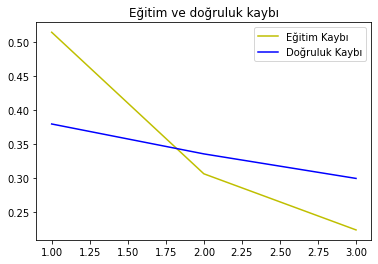

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

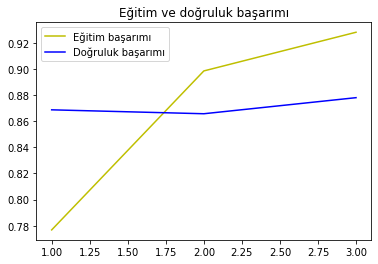

In [29]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [30]:
result = Model.evaluate(x_test,y_test) ## Çokda bir fark olmadı :D

782/782 [==============================] - 2s 2ms/step - loss: 0.3212 - accuracy: 0.8695


Tahmin

In [31]:
Model.predict(x_test)

array([[0.23937228],
       [0.9961423 ],
       [0.6574407 ],
       ...,
       [0.10737476],
       [0.2011537 ],
       [0.49372354]], dtype=float32)

İleri Gözlemler

- Bir Katman

In [32]:
Model_one = Sequential()
Model_one.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_one.add(Dense(1, activation= 'sigmoid'))
Model_one.summary()

Model_one.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_one = Model_one.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5755 - accuracy: 0.7131 - val_loss: 0.4080 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3380 - accuracy: 0.8991 - val_loss: 0.3243 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2567 - accuracy: 0.9251 - val_loss: 0.2946 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2104 - accur

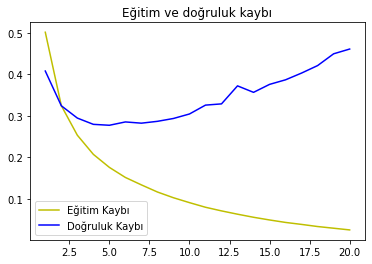

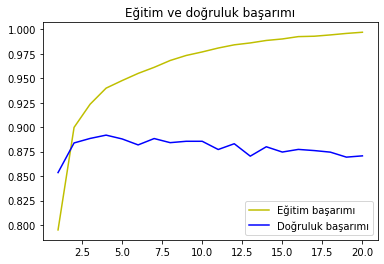

In [33]:
import matplotlib.pyplot as plt

history_dict = history_one.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [34]:
result_one = Model_one.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.5020 - accuracy: 0.8562


- 3 Katman

In [35]:
Model_three = Sequential()
Model_three.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_three.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_three.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_three.add(Dense(1, activation= 'sigmoid'))
Model_three.summary()

Model_three.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_three = Model_three.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5982 - accuracy: 0.7073 - val_loss: 0.3855 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3133 - accuracy: 0.9086 - val_

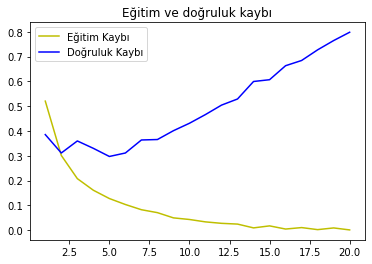

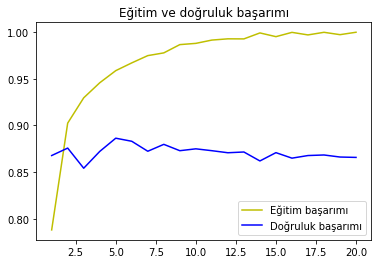

In [36]:
history_dict = history_three.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [37]:
result_three = Model_three.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8809 - accuracy: 0.8490


- 32 Nöron

In [38]:
Model_three_two = Sequential()
Model_three_two.add(Dense(32, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_three_two.add(Dense(32, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_three_two.add(Dense(1, activation= 'sigmoid'))
Model_three_two.summary()

Model_three_two.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_three_two = Model_three_two.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 321,121
Trainable params: 321,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5735 - accuracy: 0.7013 - val_loss: 0.3685 - val_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2873 - accuracy: 0.9028 - val_loss: 0.2929 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1924 - accuracy: 0.93

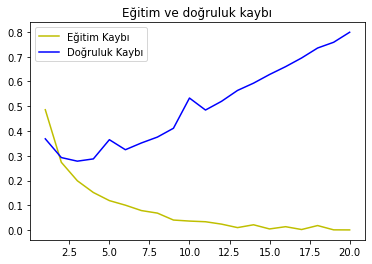

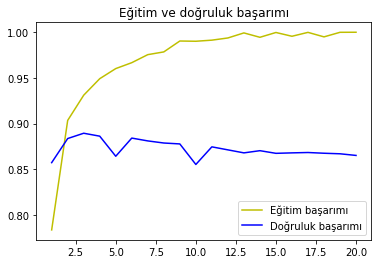

In [39]:
history_dict = history_three_two.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [40]:
result_three_two = Model_three_two.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8922 - accuracy: 0.8480


62 Nöron

In [41]:
Model_six_four = Sequential()
Model_six_four.add(Dense(64, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_six_four.add(Dense(64, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_six_four.add(Dense(1, activation= 'sigmoid'))
Model_six_four.summary()

Model_six_four.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_six_four = Model_six_four.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5758 - accuracy: 0.6842 - val_loss: 0.3709 - val_accuracy: 0.8474
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2752 - accuracy: 0.9007 - val_loss: 0.3760 - val_accuracy: 0.8389
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1939 - accuracy: 0.93

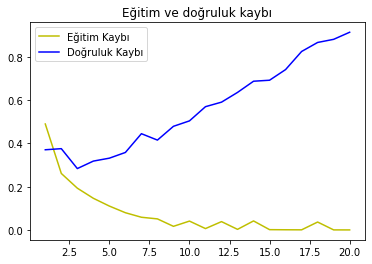

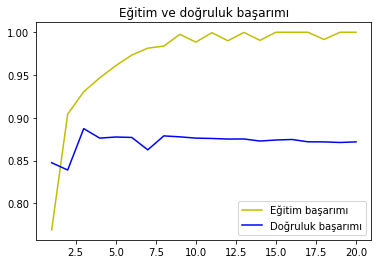

In [42]:
history_dict = history_six_four.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [43]:
result_six_four = Model_six_four.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.0224 - accuracy: 0.8547


- Tanh

In [44]:
Model_tanh = Sequential()
Model_tanh.add(Dense(16, activation= 'tanh', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_tanh.add(Dense(16, activation= 'tanh', input_shape = (x_train.shape[1],)))
Model_tanh.add(Dense(1, activation= 'sigmoid'))
Model_tanh.summary()

Model_tanh.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_tanh = Model_tanh.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5721 - accuracy: 0.7123 - val_loss: 0.3941 - val_accuracy: 0.8402
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2982 - accuracy: 0.9079 - val_loss: 0.2884 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2024 - accuracy: 0.93

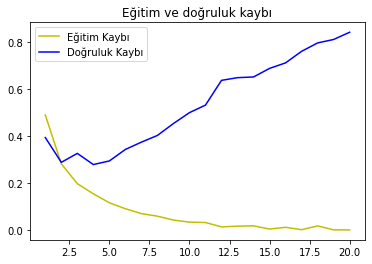

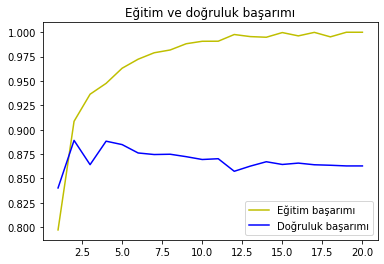

In [45]:
history_dict = history_tanh.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [46]:
result_tanh = Model_tanh.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.9547 - accuracy: 0.8439


In [47]:
## epochs = 20 
## çıkış ==> loss, accuracy
print('result_one: ',result_one) ## tek hidden katmanlı 16 nöronlu 
print('result_Three: ',result_three) ## 3 hidden katmanlı 16 nöronlu
print('result_three_two: ',result_three_two) ## 2 hidden katmanlı 32 nöronlu
print('result_six_four: ',result_six_four) ## 2 hidden katmanlı 64 nöronlu
print('result_tanh: ',result_tanh) ## 2 hidden katmanlı 16 nöronlu aktivasyon func = tanh


result_one:  [0.502029538154602, 0.8562399744987488]
result_Three:  [0.8809360861778259, 0.8490399718284607]
result_three_two:  [0.8921645283699036, 0.8479599952697754]
result_six_four:  [1.0223814249038696, 0.8547199964523315]
result_tanh:  [0.9546948671340942, 0.8438799977302551]


- Dropout

In [48]:
from keras.layers import Dropout

Model_dropout = Sequential()
Model_dropout.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_dropout.add(Dropout(0.5))
Model_dropout.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_dropout.add(Dropout(0.5))
Model_dropout.add(Dense(1, activation= 'sigmoid'))
Model_dropout.summary()

Model_dropout.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_dropout = Model_dropout.fit(partial_x_train,partial_y_train,epochs = 8, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
30/30 [==============================] - 1s 26ms/step - loss: 0.6769 - accuracy: 0.5568 - val_loss: 0.58

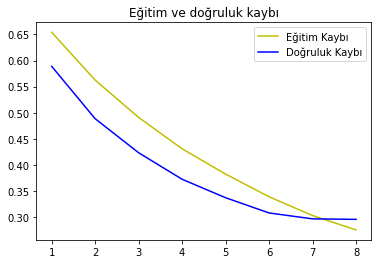

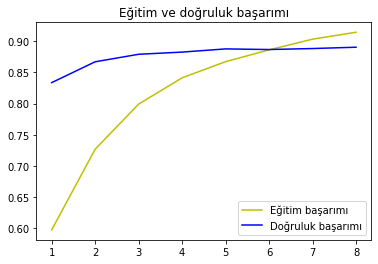

In [49]:
import matplotlib.pyplot as plt

history_dict = history_dropout.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [50]:
result_dropout = Model_dropout.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3147 - accuracy: 0.8842


- Regularization

In [91]:
from keras.layers import Dropout
from keras import regularizers

Model_regularizer = Sequential()
Model_regularizer.add(Dense(24, activation= 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (x_train.shape[1],)))
Model_regularizer.add(Dense(24, activation= 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (x_train.shape[1],)))
Model_regularizer.add(Dense(1, activation= 'sigmoid'))
Model_regularizer.summary()

Model_regularizer.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_regularizer = Model_regularizer.fit(partial_x_train,partial_y_train,epochs = 8, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 24)                240024    
_________________________________________________________________
dense_70 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 25        
Total params: 240,649
Trainable params: 240,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
30/30 [==============================] - 2s 53ms/step - loss: 0.6456 - accuracy: 0.6977 - val_loss: 0.4387 - val_accuracy: 0.8592
Epoch 2/8
30/30 [==============================] - 1s 19ms/step - loss: 0.3703 - accuracy: 0.9002 - val_loss: 0.3707 - val_accuracy: 0.8769
Epoch 3/8
30/30 [==============================] - 1s 19ms/step - loss: 0.2961 - accuracy: 0.9174

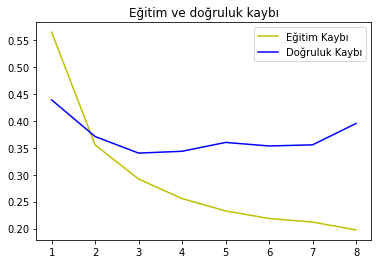

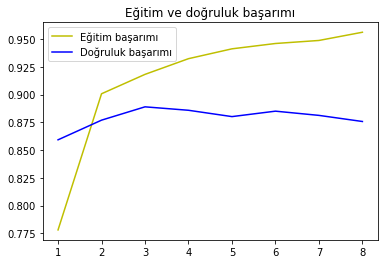

In [92]:
import matplotlib.pyplot as plt

history_dict = history_regularizer.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [93]:
result_regularizer = Model_regularizer.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4097 - accuracy: 0.8667
